# PART 1: Preliminaries

## Import libraries

In [17]:
import pandas as pd
import numpy as np
import csv
import string
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from emoji import UNICODE_EMOJI
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set(font_scale=2)

%matplotlib inline

## Get Salvini - Di Maio tweets

In [2]:
# Consumer keys and access tokens, used for OAuth
consumer_key = 'VItwf71MCW7TB6icT6pZKYN2V'
consumer_secret = 'SIX6ApebSzwK4Lh54eVnfR6Wz4IlJHMfltnEuy68OGuNR9DeeO'
access_token = '50273262-zjYGGrHiDyQdrY8TigjiPu71nRfEktAuP7mqvKMaK'
access_token_secret = 'maODpBawd42sG8fC4dpqYgApg8V06PsuE3hY62bNSX33Z'

# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

collect_tweets_Salvini=[]
collect_tweets_DiMaio=[]

collect_tweets_Salvini=[]
for status in tweepy.Cursor(api.user_timeline, screen_name='@matteosalvinimi').items():
    #Split and re-join to get rid of \n and similar charachters
    temp = status._json['text']
    temp = ' '.join(temp.split())
    collect_tweets_Salvini.append(temp)
    
for status in tweepy.Cursor(api.user_timeline, screen_name='@luigidimaio').items():
    temp = status._json['text']
    temp = ' '.join(temp.split())
    collect_tweets_DiMaio.append(temp)

## Write into .txt file

In [3]:
with open('Salvini.txt', 'w') as f:
    for item in collect_tweets_Salvini:
        f.write("%s\n" % item)
        
        
with open('DiMaio.txt', 'w') as f:
    for item in collect_tweets_DiMaio:
        f.write("%s\n" % item)

## Read from .txt file

In [4]:
tweets_Salvini = []
tweets_DiMaio = []


with open('./Salvini.txt', 'r') as file:
    txt_reader = file.readlines()
    for line in txt_reader:
        tweets_Salvini.append(line)
        
        
with open('./DiMaio.txt', 'r') as file:
    txt_reader = file.readlines()
    for line in txt_reader:
        tweets_DiMaio.append(line)
        

## Defining functions

In [110]:

#List of relevant and frequent emoji
emoji_list = ['😂', '👉🏻','💪','🔴','😊','😞','🤔','✅','🛑','🔵','🙂','👏','😁','😯','😱','😉','😃','📞']



#Get dictionaty keys and values in a list
def return_keys(my_dict):
    return list(my_dict.keys())

def return_values(my_dict):
    return list(my_dict.values())




#Find emoji in a word

def is_emoji(s):
    count = 0
    for emoji in emoji_list:
        count += s.count(emoji)
        if count > 1:
            return False
    return bool(count)


#Clean a word. Ignore the word if some conditions are met
def goodWord(word):
    
    len_ = len(word)
    
    if word =='…' or word[0] == '@' or is_emoji(word):
        return False
    elif word == 'rt' or word[0] == '&' or word =='…':
        return False
    elif word[0] == '#':
        return word[1:].lower()
    elif word[len_-1] == '…':
        return word[:len_-1].lower()
    elif 'http' in word:
        return False
    elif word == '...':
        return False
    elif word =='RT':
        return False
    elif word[len_-1] in string.punctuation:
        punct = word[len_-1]
        word = word[:len_-1].lower()
        return [word,punct]
    else:
        return word.lower()
    
    
    
#CLEANING A TWEET

def prune_tweet(tweet):
    
    clean_tweet = []
    
    if len(tweet) > 0:
        tweet = tweet.split()
        
        for word in tweet:
            lw = len(word)
            #if word != 'rt'  and word[0] != '&' and word !='…':
             #   if word[0] == '#':
              #      word = word[1:]
               # elif word[lw-1] == '…':
                #    word = word[:lw-1]
            clean_word = goodWord(word)
            if type(clean_word) is list:
                for item in clean_word:
                    clean_tweet.append(item)
            else:
                if clean_word != False:
                    clean_tweet.append(clean_word)
    
    return clean_tweet


def tweet_process(tweet):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in tweet if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    

    temp = [word for word in nopunc.split() if word.lower() not in stopwords.words('italian')]
    
    return ' '.join(temp)


def remove_duplicate_words(tweet):
    return ' '.join(set(tweet.split()))
 


def clean_tweets(tweets_list):
    
    temp = list(map(prune_tweet,tweets_list))
    temp = list(map(lambda x: ' '.join(x), temp))
    temp = list(map(tweet_process, temp))
    temp = list(map(remove_duplicate_words, temp))

    
    return temp
            

# Part 2: Exploratory Data Anlysis

## We prune the tweets by using the fucntions above 

In [111]:
clean_Salvini = clean_tweets(tweets_Salvini)
clean_DiMaio = clean_tweets(tweets_DiMaio)

In [112]:
list_words_Salvini = [word for tweet in clean_Salvini for word in tweet.split()]
list_words_DiMaio = [word for tweet in clean_DiMaio for word in tweet.split()]

##  Generate a word cloud image:

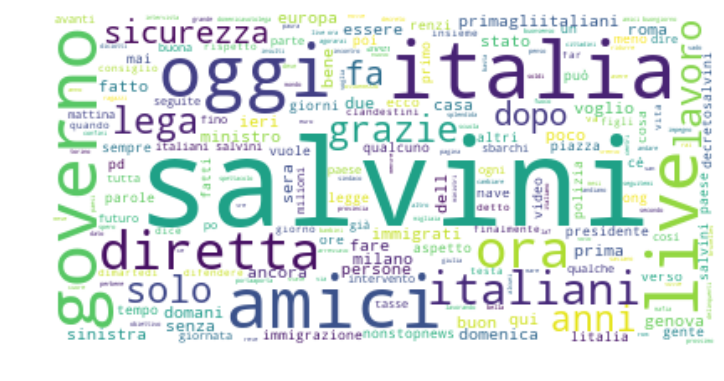

In [113]:
one_string_Salvini = ''
for item in list_words_Salvini:
    one_string_Salvini = one_string_Salvini + ' '+ item
    
one_string_DiMaio = ''
for item in list_words_DiMaio:
    one_string_DiMaio = one_string_DiMaio + ' '+ item


wordcloud = WordCloud(background_color='white').generate(one_string_Salvini)

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

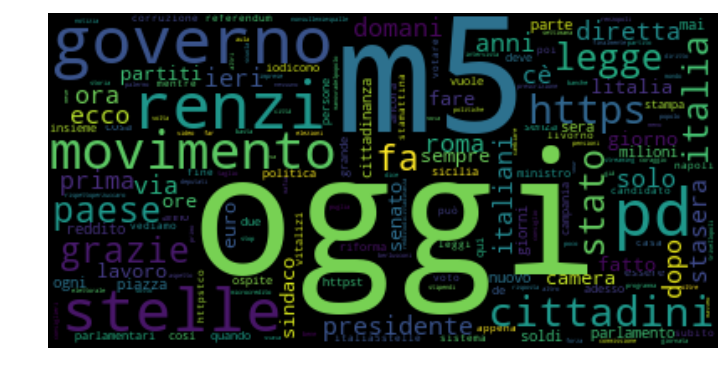

In [114]:
wordcloud = WordCloud().generate(one_string_DiMaio)

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Let us analyze top20 words and their frequency

In [115]:
df_Salvini = pd.DataFrame(list_words_Salvini, columns = ['word'])
df_DiMaio = pd.DataFrame(list_words_DiMaio, columns = ['word'])

In [116]:
top20_Salv_vec = df_Salvini['word'].value_counts(ascending = False).head(20).reset_index()
top_words = list(top20_Salv_vec['index'])
top20_Salv = df_Salvini[df_Salvini['word'].apply(lambda x: x in top_words)]


top20_DM_vec = df_DiMaio['word'].value_counts(ascending = False).head(20).reset_index()
top_words = list(top20_DM_vec['index'])
top20_DM = df_DiMaio[df_DiMaio['word'].apply(lambda x: x in top_words)]

/Users/manueloffidani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


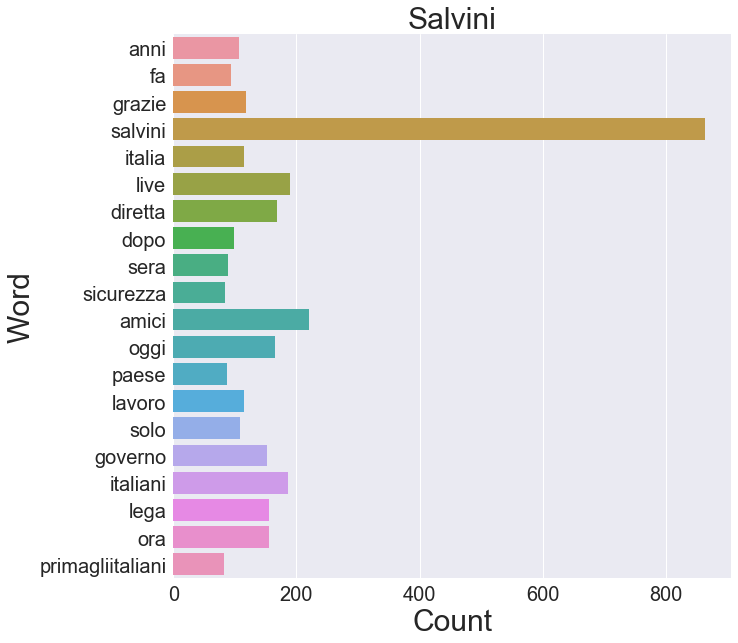

In [117]:
fig = plt.figure(figsize=(10,10))
b = sns.countplot(y ='word', data = top20_Salv )
b.axes.set_title("Salvini",fontsize=30)
b.set_xlabel("Count",fontsize=30)
b.set_ylabel("Word",fontsize=30)
fig.show()

/Users/manueloffidani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


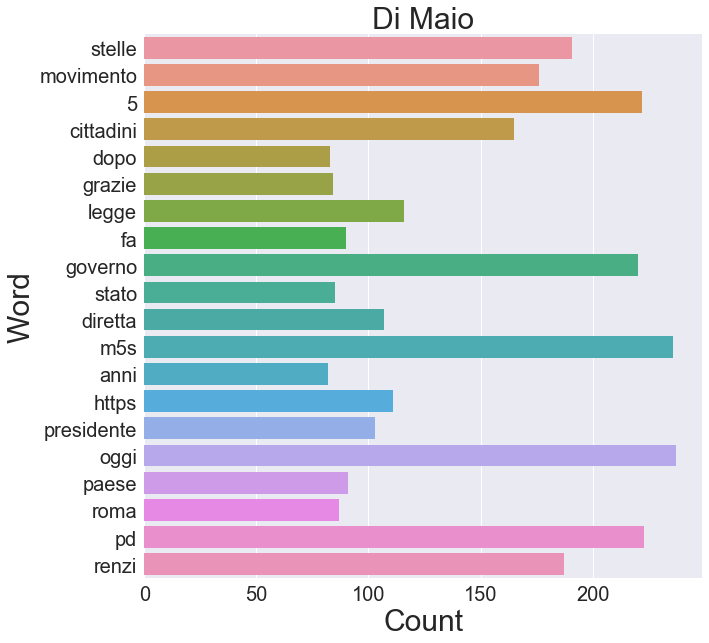

In [118]:
fig = plt.figure(figsize=(10,10))
b = sns.countplot(y ='word', data = top20_DM)
b.axes.set_title("Di Maio",fontsize=30)
b.set_xlabel("Count",fontsize=30)
b.set_ylabel("Word",fontsize=30)
fig.show()

# Part 3: measuring the overlap

## What's the most representative tweets by Salvini

In [119]:
top20words_Salvini = list(top20_Salv['word'].unique())

In [120]:
top20words_Salvini

['anni',
 'fa',
 'grazie',
 'salvini',
 'italia',
 'live',
 'diretta',
 'dopo',
 'sera',
 'sicurezza',
 'amici',
 'oggi',
 'paese',
 'lavoro',
 'solo',
 'governo',
 'italiani',
 'lega',
 'ora',
 'primagliitaliani']

In [121]:
best_tweets_Salvini = []
clean_Salvini_temp = clean_Salvini

while len(best_tweets_Salvini)<5:
    max_ = 0
    index = 0
    for i, item in enumerate(clean_Salvini_temp):
        count = 0
        for word in top20words_Salvini:
            count = count + item.split().count(word)
        if count > max_:
            max_ = count
            index = i
        
    best_tweets_Salvini.append(clean_Salvini[index])
    clean_Salvini_temp = clean_Salvini_temp[:index] + clean_Salvini_temp[index+1:]

best_tweets_Salvini    

['dopo pro offro lavoro solo mesi italiani stipendio salvini pagano decreto',
 'zona aspetto roma gazebo gian amici piazza grassi lega fiumicino battista 1530',
 'rai live commentate ascoltate intervento radio mattina va 1',
 'presidente fatti diventare consiglio lora vedo salvini passare finalmente parole',
 'grazie']

## Count for every Di Maio's tweet its overlap with any of the top 5 tweets by Salvini

In [122]:
#key_words_Salvini = [item for tweet in best_tweets_Salvini for item in tweet.split()]

overlap_DM = np.zeros(shape=(len(clean_DiMaio),len(best_tweets_Salvini)))

j=0
for element in best_tweets_Salvini:
    for i, item in enumerate(clean_DiMaio):
        count = 0
        len_ = len(item.split())
        if len_>5:
            for word in element.split():
                count = count + item.split().count(word)
    
                overlap_DM[i,j] = count/len_
    j+=1
        


In [123]:
overlap_DM = pd.DataFrame(overlap_DM, columns=['tweet1','tweet2','tweet3','tweet4','tweet5'])
overlap_DM.head()

,tweet1,tweet2,tweet3,tweet4,tweet5
0,0.000000,0.0,0.0,0.0,0.000000
1,0.111111,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.083333
3,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.000000


In [124]:
overlap_DM.describe()

,tweet1,tweet2,tweet3,tweet4,tweet5
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000
mean,0.010230,0.005638,0.002882,0.006430,0.002647
std,0.032164,0.025665,0.018086,0.028203,0.017081
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.250000,0.428571,0.285714,0.333333,0.166667


In [ ]:
#The max is at the first columnn. Where?

In [125]:
overlap_DM[overlap_DM['tweet2']==overlap_DM['tweet2'].max()]

,tweet1,tweet2,tweet3,tweet4,tweet5
1645,0.0,0.428571,0.0,0.0,0.0


In [28]:
#Let's see the tweets

In [109]:
best_tweets_Salvini[1]

'zona aspetto roma gazebo gian amici piazza grassi lega fiumicino battista 1530'

In [108]:
clean_DiMaio[1645]

'aspetto roma piazza domani cambiamotutto popolo coraggio'

# Part 4: Markov Chains for tweet generation

In [126]:
def firstMarkov(data):
    markov_model = {}
    
    for line in data:
        for i in range(len(line)):
            markov_model[line[i]] = {}
            
    for line in data:
        for i in range(len(line)-1):
            if(line[i+1]) in markov_model[line[i]]:
                markov_model[line[i]][line[i+1]] +=1
            else:
                 markov_model[line[i]][line[i+1]] =1
                
                
            
    return markov_model


def normalizeFirstMarkov(my_dict):
    
    all_keys = my_dict.keys()
    
    for item in all_keys:
        temp = my_dict[item]
        sum_ = sum(list(temp.values()))
        for subitem in temp.keys():
                temp[subitem] = temp[subitem]/sum_
    
    return my_dict
    
    
def generateSentence(my_dict):
    sentence = []
    
    ml = return_keys(my_dict)
    fw = np.random.choice(ml,1)
    sentence.append(fw[0])
    
    count=0
        
    while count < 3:
        if fw[0] in string.punctuation:
            count +=1
        ml = return_keys(my_dict[fw[0]])
        pr = return_values(my_dict[fw[0]])
        
        if len(ml)>0:
            fw = np.random.choice(ml,1, p = pr)
            sentence.append(fw[0])
        else:
             while len(ml)== 0:
                    #print('k')
                    ml = return_keys(my_dict)
                    fw = np.random.choice(ml,1)
                    
    sentence.append('.')
    
    for item in sentence:
         print(item, sep=' ', end=' ', flush=True)
        
    sentence.append('.')

# Generate tweets for the two leaders

### Note here we need the full punctuation, the inclusion of articles etc. and also duplicate words.

In [127]:
clean_Salvini_WP = list(map(prune_tweet,tweets_Salvini))
clean_DiMaio_WP = list(map(prune_tweet,tweets_DiMaio))

In [129]:
dict_S = firstMarkov(clean_Salvini_WP)
Salvini = normalizeFirstMarkov(dict_S)

dict_DM = firstMarkov(clean_DiMaio_WP)
DiMaio = normalizeFirstMarkov(dict_DM)


### Finally: generation

In [130]:
generateSentence(Salvini)

interessi dei connazionali , per parlare del governo , per nascere avrebbe potuto scriverlo un paese in pensione più favorevole alle 9.15 e nessun fascismo il vostro servizio che maiorca ? silvio . 

In [135]:
generateSentence(DiMaio)

ciaociao vitalizi quando hai dato ragione sulla leggeelettorale decidono al mondo , m5s a tutti i cittadini . uno dei deputati all'originalissima relazione dei ballottaggi , poi . 

In [456]:
s1 = 'pasolini scriveva in italia si è rinchiuso nel suo orgoglio e anti-salvini , dalle 7 mesi del centro di invalidità . questa mattina deve rispettare l’italia , rozzo . '